In [1]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/')
from utility import *

# main figure 

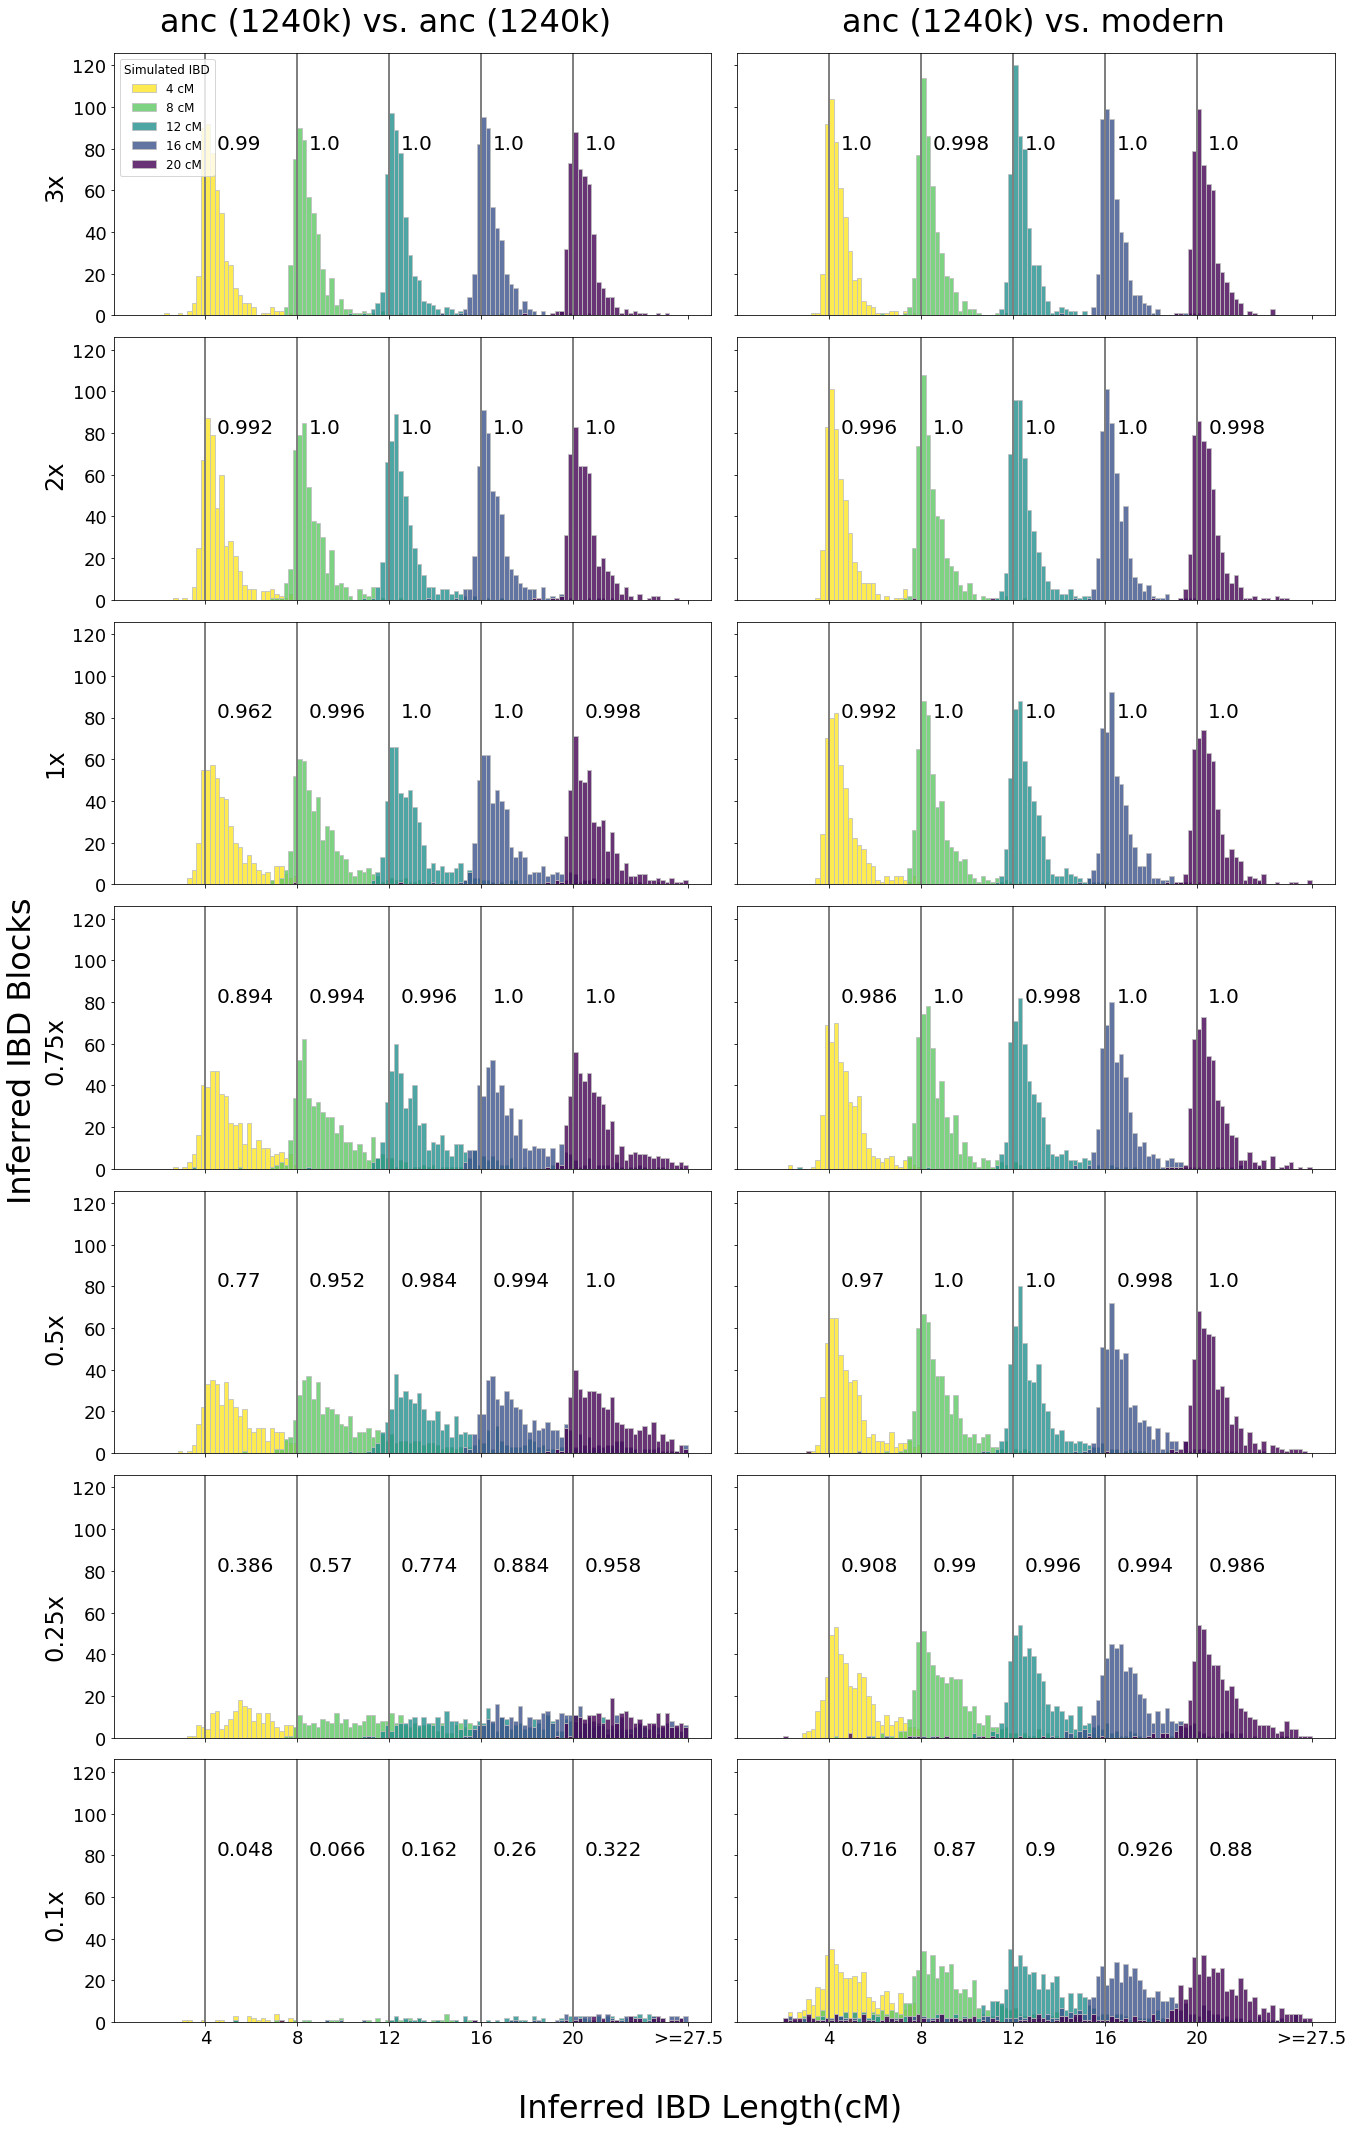

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

plt.rcParams["font.family"] = "Arial"
fig, axs = plt.subplots(7, 2, sharex=True, sharey=True, figsize=(18, 28), tight_layout=True)

covs = ['cov3', 'cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov3':'3x', 'cov2':'2x', 'cov1':'1x', 'cov1over2':'0.5x', 'cov3over4':'0.75x', \
        'cov1over4':'0.25x', 'cov1over10':'0.1x'}
modes = ['1240k', 'anc1240kVSmod']

bl_lens = [4, 8, 12, 16, 20]
bins = np.linspace(0, 25, 126) # bins of 0.2cm

fs_l = 12
fs = 12
fs_t = 18
color_fp = "red"
ec = "silver"
cmap = "viridis_r"
alpha = 0.8
xlim = (0,26)

for row, cov in enumerate(covs):
    for col, mode in enumerate(modes):

        df_called, powers = lengthCallAll(bl_lens, cov, f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/calledIBD', threshold=0.8)
        assert(len(bl_lens)==len(df_called)==len(powers)) # Sanity Check
    
        ### Set Colors
        cmap = cm.get_cmap(cmap)
        colors = [cmap(x) for x in np.linspace(0,1, len(bl_lens))]
    
        ####### Do the actual Plot
        ax = axs[row, col]
        # Plot All Histograms        
        for i in range(len(bl_lens)):
            l = bl_lens[i]
            df_called_trunc = np.array(df_called[i])
            #print(np.mean(df_called_trunc))
            #print(len(df_called_trunc))
            df_called_trunc[df_called_trunc>=27.5] = 27.5
            ax.hist(df_called_trunc, bins = bins, color = colors[i], alpha=alpha, 
                label= str(l) + " cM", ec=ec)
            ax.axvline(l, color = "gray", linewidth=2)
            ax.text(l+0.5, 80, round(powers[i], 3), fontsize=20, fontweight='roman')
    
        # if len(df_fp)>0:
        #     ax.hist(df_fp["lengthM"]*100, bins = bins, color = color_fp, 
        #         alpha=0.5, label= "FP", ec=ec)
        
        ax.set_xlim(xlim)
        ax.set_xticks(bl_lens + [25])
        ax.set_xticklabels(bl_lens + ['>=27.5'])
        ax.tick_params(axis='both', labelsize=fs_t)
        if row == col == 0:
            legend = ax.legend(loc = 'upper left', fontsize = fs_l, title="Simulated IBD")
            legend.get_title().set_fontsize(fs_l)
    fig.text(-0.005, 13/14 - row/7, cov2str[cov], ha='center', va='center', rotation='vertical', fontsize=24)


fig.text(0.25, 1.01, 'anc (1240k) vs. anc (1240k)', ha='center', va='center', fontsize=32)
fig.text(0.75, 1.01, 'anc (1240k) vs. modern', ha='center', va='center', fontsize=32)

fig.text(0.5, -0.025, 'Inferred IBD Length(cM)', ha='center', va='center', fontsize=32)
fig.text(-0.03, 0.5, 'Inferred IBD Blocks', ha='center', va='center', rotation='vertical', fontsize=32)
plt.savefig('syntheticIBDpanel.png', dpi=300, bbox_inches="tight")
plt.savefig('syntheticIBDpanel.pdf', dpi=300, bbox_inches="tight")